# Gapminder data
### exploratory analysis

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Geting only 1800s and prepering data

In [211]:
gapminder = pd.read_csv('gapminder.csv')
gapminder = pd.concat([gapminder.loc[:, 'Life expectancy'], gapminder.iloc[:, 1:101]], axis=1)
gapminder.rename(columns ={0: 'Life expectancy'}, inplace =True)
gapminder.drop_duplicates(['Life expectancy'], keep="first", inplace=True)
gapminder.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


In [212]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 207.2+ KB


In [213]:
gapminder.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.000000,22.180000,22.000000,20.000000,19.000000,19.700000,18.900000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,29.200000,29.200000,29.000000,29.000000,29.200000,29.200000,29.000000,29.200000,29.160000,29.000000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,35.000000,35.100000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.180000,35.180000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.480000,51.090000,52.730000,52.580000,52.100000,54.160000,53.840000,54.140000,54.690000,51.620000


In [214]:
gapminder.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899'],
      dtype='object', length=101)

In [215]:
gapminder.shape

(260, 101)

### Visualizing data

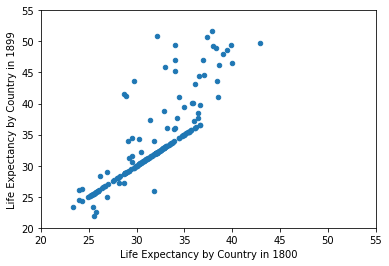

In [216]:
gapminder.plot(kind='scatter', x='1800', y='1899')
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')
# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)
plt.show()

### Checking data validity

In [217]:
def check_null_or_valid(row_data):
    """Function that takes a row of data, drops all missing
    values, and checks if all remaining values are greater
    than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [218]:
assert gapminder.columns[0] == 'Life expectancy'

In [219]:
gapminder.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899'],
      dtype='object', length=101)

In [220]:
assert gapminder.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

In [221]:
gapminder['Life expectancy'].value_counts()

Netherlands                 1
Maldives                    1
Guernsey                    1
Palau                       1
Angola                      1
Solomon Islands             1
Guyana                      1
Netherlands Antilles        1
Pitcairn                    1
Serbia                      1
Philippines                 1
Moldova                     1
Andorra                     1
Iraq                        1
Nepal                       1
Dominica                    1
Puerto Rico                 1
Azerbaijan                  1
United Arab Emirates        1
Ethiopia                    1
Zambia                      1
Isle of Man                 1
Mongolia                    1
Libya                       1
Greenland                   1
Norway                      1
Turks and Caicos Islands    1
El Salvador                 1
Svalbard                    1
Papua New Guinea            1
                           ..
Cayman Islands              1
Togo                        1
Nicaragua 

In [222]:
assert gapminder['Life expectancy'].value_counts()[0] == 1

### Reshaping data

In [223]:
gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')

In [224]:
gapminder_melt.columns = ['country', 'year', 'life_expectancy']
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


### Checking the data types

In [225]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 3 columns):
country            26000 non-null object
year               26000 non-null object
life_expectancy    20100 non-null float64
dtypes: float64(1), object(2)
memory usage: 609.5+ KB


In [226]:
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

In [227]:
assert gapminder_melt.country.dtypes == np.object
assert gapminder_melt.year.dtypes == np.int64
assert gapminder_melt.life_expectancy.dtypes == np.float64

### Cleaning and processing

In [228]:
assert pd.notnull(gapminder_melt.country).all()

In [229]:
assert pd.notnull(gapminder_melt.year).all()

In [232]:
gapminder = gapminder.dropna()
print(gapminder_melt.shape)

(26000, 3)


### Ploting

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
1895    32.811841
1896    32.895224
1897    32.964279
1898    32.994080
1899    32.962985
Name: life_expectancy, dtype: float64


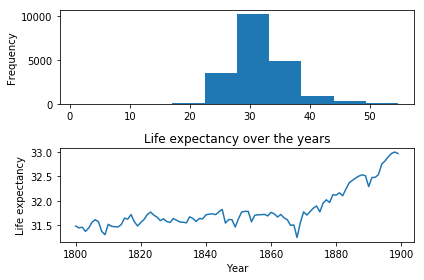

In [233]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()